# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines
! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [5]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,810,97,55,103,197,63,11,215,31,24,172,219,677,219,75,5,24,185,194
1,563,89,42,75,140,55,6,145,46,19,139,170,312,166,71,15,26,191,198
2,450,91,46,75,185,75,7,154,42,19,147,178,362,192,72,8,8,192,199
3,360,108,52,109,182,55,12,216,31,24,171,229,687,214,72,10,28,189,201
4,78,104,52,94,208,66,5,208,31,24,161,227,666,218,76,11,4,193,191
5,708,94,49,82,137,56,10,159,43,20,160,176,367,186,76,10,7,183,192
6,617,83,37,49,112,55,5,122,55,17,128,144,219,146,85,8,16,180,184
7,219,85,39,57,126,56,6,114,58,17,135,134,195,145,64,17,7,197,202
8,604,88,40,79,183,62,7,176,38,21,138,200,462,150,66,0,29,189,199
9,54,101,56,104,185,53,6,257,26,28,168,275,956,230,83,5,26,180,184


Methods `describe` and `info` deliver some useful information.

In [6]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,423.859745,93.608379,44.686703,81.659381,167.819672,61.391621,8.304189,167.861566,41.173042,20.517304,147.311475,187.766849,435.606557,174.081967,72.240437,6.555556,12.431694,189.114754,195.743169
std,245.298225,8.386512,6.129400,15.803498,32.905282,7.320205,3.903536,33.524299,7.920978,2.598106,14.273127,32.234320,178.215685,33.147572,7.254782,4.922308,9.011417,6.185952,7.430553
min,1.000000,73.000000,33.000000,40.000000,104.000000,48.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,215.000000,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,145.000000,33.000000,19.000000,135.000000,167.000000,314.000000,147.000000,67.000000,2.000000,5.000000,185.000000,190.000000
50%,426.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,638.000000,100.000000,49.000000,96.000000,193.000000,65.000000,10.000000,197.000000,46.000000,23.000000,158.000000,215.000000,579.000000,198.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,843.000000,119.000000,58.000000,110.000000,333.000000,138.000000,49.000000,265.000000,61.000000,29.000000,180.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [22]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [21]:
### YOUR CODE HERE

from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

The best parameters are {'C': 11.288378916846883, 'l1_ratio': 1.0, 'penalty': 'elasticnet'}
F1 score of this model: 0.7673959782588533
Accuracy score of this model: 0.7710437710437711



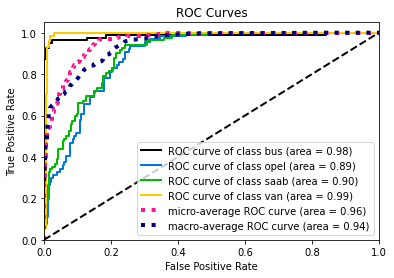

In [20]:
### YOUR CODE HERE

# Install scikit-plot
# ! pip install scikit-plot

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import scikitplot
import numpy as np
import matplotlib.pyplot as plt
import warnings

model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

param_grid = {'C': np.logspace(-4, 4, 20), 'l1_ratio': np.linspace(0, 1, 11), 'penalty' :['elasticnet']}

search = GridSearchCV(model, param_grid, cv=5).fit(X_train_scaled, y_train)

y_predicted = search.predict(X_test_scaled)

print(f"The best parameters are {search.best_params_}")
print(f"F1 score of this model: {f1_score(y_test, y_predicted, average='macro')}")
print(f"Accuracy score of this model: {search.score(X_test_scaled, y_test)}\n")
    
# Plot the ROC-curve
predicted_proba = search.predict_proba(X_test_scaled)
scikitplot.metrics.plot_roc(y_test, predicted_proba)
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

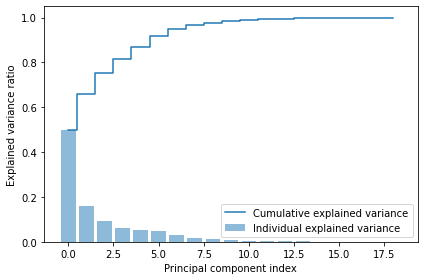

In [29]:
### YOUR CODE HERE
from numpy.linalg import eigh
import matplotlib.pyplot as plt

egnvalues, egnvectors = eigh(np.cov(X_train_scaled, rowvar=False))
# Explained variance
exp_var = [(i/sum(egnvalues)) for i in sorted(egnvalues, reverse=True)]
# Cumulative sum of eigenvalues
cum_sum_eigenvalues = np.cumsum(exp_var)
# Create the plot
plt.bar(range(0,len(exp_var)), exp_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [28]:
### YOUR CODE HERE

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

The best parameters are {'C': 0.08858667904100823, 'l1_ratio': 0.0, 'penalty': 'elasticnet'}
F1 score of this model: 0.6165648476834482
Accuracy score of this model: 0.6296296296296297




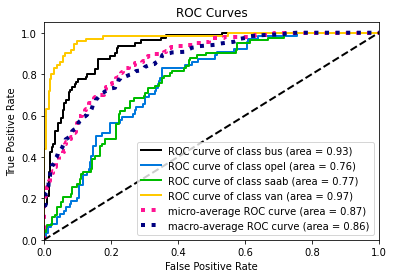

In [32]:
### YOUR CODE HERE

from sklearn.decomposition import PCA

pca = PCA()

X_train_fit = pca.fit_transform(X_train)
X_test_fit = pca.fit_transform(X_test)

model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
param_grid = {'C': np.logspace(-4, 4, 20), 'l1_ratio': np.linspace(0, 1, 11), 'penalty' :['elasticnet']}
search = GridSearchCV(model, param_grid, cv=5).fit(X_train_fit, y_train)
y_predicted = search.predict(X_test_fit)

print(f"The best parameters are {search.best_params_}")
print(f"F1 score of this model: {f1_score(y_test, y_predicted, average='macro')}")
print(f"Accuracy score of this model: {search.score(X_test_fit, y_test)}\n")

# Plot the ROC-curve
predicted_proba = search.predict_proba(X_test_fit)
scikitplot.metrics.plot_roc(y_test, predicted_proba)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

The best parameters are: {'criterion': 'entropy', 'max_depth': 24}
The max_depth is 24
F1 score: 0.6652791478979981
Accuracy score: 0.6632996632996633



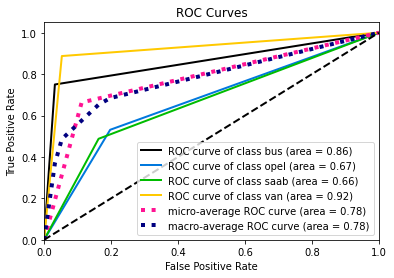

In [72]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

dtc = DecisionTreeClassifier()

search = GridSearchCV(
    dtc, 
    {
      "max_depth": np.linspace(1, 32, 32, dtype=np.int16),
      'criterion': ["gini", "entropy"]
    },
    cv=5).fit(X_train_scaled, y_train)

y_predicted = search.predict(X_test_scaled)

print(f"The best parameters are: {search.best_params_}")
print(f"The max_depth is {search.best_params_['max_depth']}")
print(f"F1 score: {f1_score(y_test, y_predicted, average='macro')}")
print(f"Accuracy score: {search.score(X_test_scaled, y_test)}\n")

# Plot the ROC-curve
predicted_proba = search.predict_proba(X_test_scaled)
scikitplot.metrics.plot_roc(y_test, predicted_proba)
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

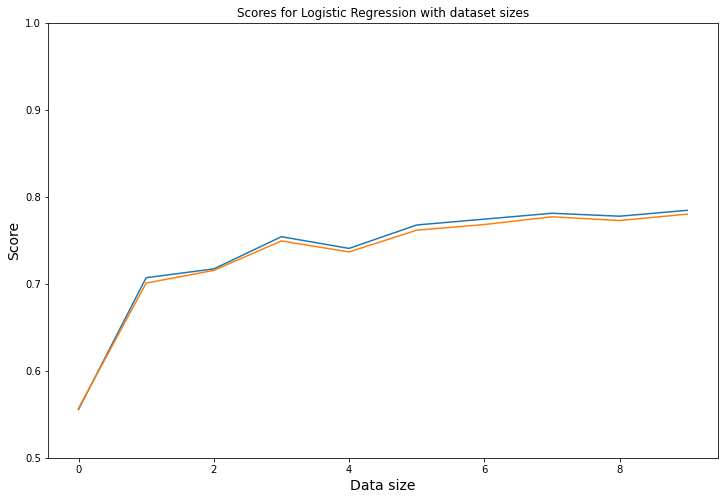

In [74]:
# YOUR CODE HERE

SIZE = 10

def get_accuracy_and_score():
  accuracy_score = np.zeros(SIZE)
  f1_test_score = np.zeros(SIZE)

  logisticReg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=0.6158, l1_ratio=0.9, penalty='elasticnet')

  for i in range(SIZE):
      data_size = int(X_train.shape[0] * (i + 1) / 10)
      model = logisticReg.fit(X_train_scaled[:data_size], y_train[:data_size])
      accuracy_score[i] = model.score(X_test_scaled, y_test)
      y_predicted = model.predict(X_test_scaled)
      f1_test_score[i] = f1_score(y_test, y_predicted, average='macro')
    
  return accuracy_score, f1_test_score

accuracy_score, f1_test_score = get_accuracy_and_score()

# Create plot
plt.figure(figsize=(12, 8))
plt.xlabel("Data size", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.plot(np.arange(SIZE), accuracy_score, label='accuracy score')
plt.plot(np.arange(SIZE), f1_test_score, label='f1 score')
plt.ylim(0.5, 1)
plt.title("Scores for Logistic Regression with dataset sizes")
plt.show()